In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [2]:
# load attributes 
data_dir = os.getcwd() + '\\Data\\'
train_data = pd.read_csv(data_dir + 'train.csv')
train_labels = pd.read_csv(data_dir + 'train_labels.csv')
train_label_bits = np.genfromtxt(data_dir + 'train_label_bits.csv', delimiter=',', dtype=np.float32) 

In [3]:
# loadin revised images
image_dir = data_dir + 'images\\res_rev_05\\' 

# total count of samples
sample_count = 1584

# load images
images = []
for image_label in range(sample_count):
    image = mpimg.imread(image_dir + str(image_label + 1) + '.jpg')
    images.append(image)
    
images = np.array(images)

In [4]:
TOTAL_COUNT = len(images)
TRAIN_COUNT = len(train_data) # training image count in input csv file
IMAGE_WIDTH  = images[0].shape[0] # input image width
IMAGE_HEIGHT = images[0].shape[1] # input image height
OUTPUT_TYPE_COUNT = len(list(set(train_data['species'])))
print('Image Count: ', TOTAL_COUNT)
print('Image Size: ', IMAGE_WIDTH , 'X' , IMAGE_HEIGHT)
print('Train Count: ', TRAIN_COUNT)
print('Specy Count: ', OUTPUT_TYPE_COUNT)

Image Count:  1584
Image Size:  85 X 54
Train Count:  990
Specy Count:  99


In [5]:
train_images = images[train_data['id'] - 1]
train_images = np.reshape(train_images, (TRAIN_COUNT, IMAGE_WIDTH, IMAGE_HEIGHT, -1))
train_images.shape

(990, 85, 54, 1)

In [6]:
# model structure
C0 = 1        # input channel count Black/White
C1 = 4        # convolutional network channel count 
STRIDE = 1    # stride stepes for filter/kernel
KERNEL_W = 5  # filter/kernel width
KERNEL_H = 5  # filter/kernel height

# input images definitions
X = tf.placeholder(tf.float32, shape = [None, IMAGE_WIDTH, IMAGE_HEIGHT, C0])

# setting random normal distributed for filier/kernel
W = tf.Variable(tf.truncated_normal([KERNEL_W, KERNEL_H, C0, C1], stddev = 0.1)) 

# outputimages definitions
Y = tf.nn.conv2d(X, W, strides=[1, STRIDE, STRIDE, 1], padding='SAME')

# sample image data
batch_X = train_images[:25]
batch_X.shape

(25, 85, 54, 1)

In [7]:
# initializing TensoFlow session 
tf.set_random_seed(0) 
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

# calculating convolution
w, y = sess.run([W, Y], feed_dict = {X: batch_X})

print('W Shape:', w.shape)
print('Y Shape:', y.shape)

# closing session
sess.close()

W Shape: (5, 5, 1, 4)
Y Shape: (25, 85, 54, 4)


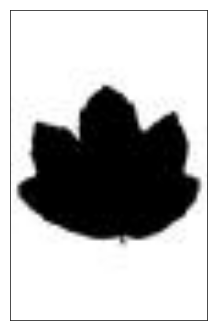

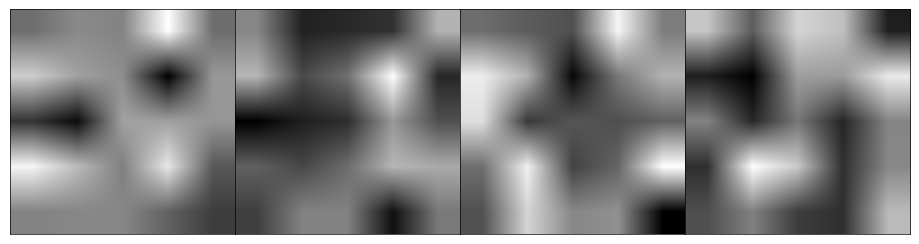

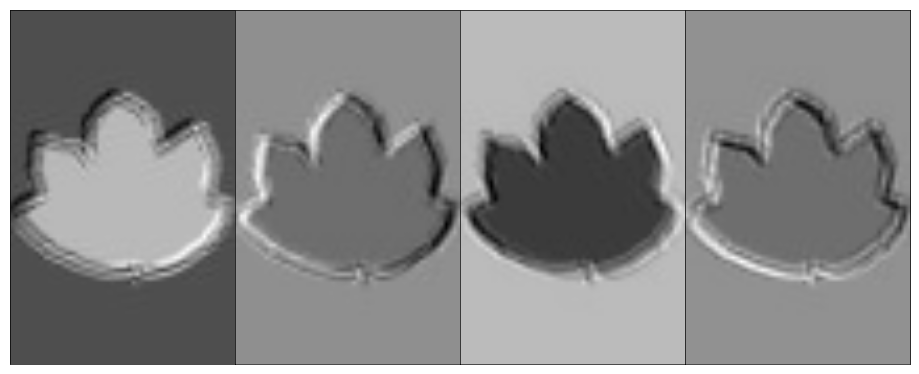

In [8]:
sample_index = 0

# show sample image
plt.rcParams['axes.linewidth'] = 0.5
fig = plt.imshow(batch_X[sample_index,:,:, 0], cmap = plt.get_cmap('gray_r'))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

# showing filter/kernel images
fig = plt.figure(figsize=(9, 9))

count = len(w[0,0,0])
for i in range(count):
    sub = plt.subplot(1, count, i + 1)
    sub.set_xticks(())
    sub.set_yticks(())
    sub.imshow(w[:,:,0,i], cmap=plt.get_cmap('gray_r'))
    
fig.tight_layout(pad = 0)
plt.show()

fig = plt.figure(figsize=(9, 9))
for i in range(count):
    sub = plt.subplot(1, count, i + 1)
    sub.set_xticks(())
    sub.set_yticks(())
    sub.imshow(y[0,:,:,i], cmap=plt.get_cmap('gray_r'))
    
fig.tight_layout(pad = 0)
plt.show()
